### Overview
For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Load Dataset


In [24]:
import pandas as pd

# Load the dataset
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1')

# Display basic information and the first few rows of the dataset
aviation_data.info(), aviation_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

C:\Users\DELL\AppData\Local\Temp\ipykernel_10780\3451667120.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('AviationData.csv', encoding='latin1')


(None,
          Event.Id Investigation.Type Accident.Number  Event.Date  \
 0  20001218X45444           Accident      SEA87LA080  1948-10-24   
 1  20001218X45447           Accident      LAX94LA336  1962-07-19   
 2  20061025X01555           Accident      NYC07LA005  1974-08-30   
 3  20001218X45448           Accident      LAX96LA321  1977-06-19   
 4  20041105X01764           Accident      CHI79FA064  1979-08-02   
 
           Location        Country   Latitude  Longitude Airport.Code  \
 0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
 1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
 2    Saltville, VA  United States  36.922223 -81.878056          NaN   
 3       EUREKA, CA  United States        NaN        NaN          NaN   
 4       Canton, OH  United States        NaN        NaN          NaN   
 
   Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
 0          NaN  ...          Personal         NaN            

In [25]:
missing_values = aviation_data.isnull().sum() / len(aviation_data) * 100
print(missing_values)


Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

### Handle Missing Values.
Drop columns with more than 50% missing values

In [26]:
aviation_data = aviation_data.loc[:, missing_values <= 50]


Drop rows with missing critical information

In [27]:
aviation_data['Aircraft.damage'].fillna('Unknown', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10780\3918964411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data['Aircraft.damage'].fillna('Unknown', inplace=True)


### Standardize Date Formats
Convert Event.Date to a datetime type

In [28]:
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')


### Exploratory Data Analysis (EDA)
1.Analyze Aircraft Types:

Get top aircraft makes and models involved in accidents:

In [29]:
top_makes = aviation_data['Make'].value_counts().head(10)
print(top_makes)


Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64


<Axes: xlabel='Injury.Severity', ylabel='count'>

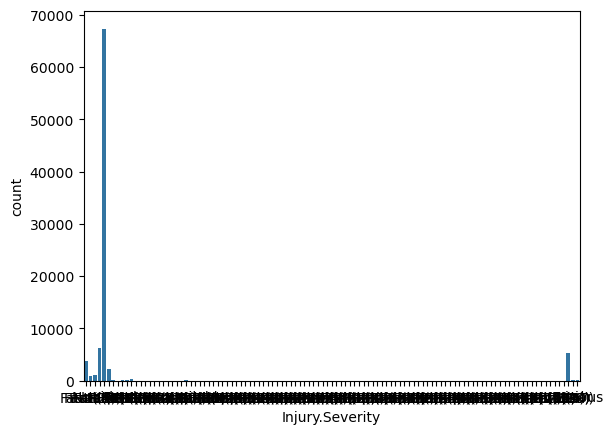

In [30]:
import seaborn as sns
sns.countplot(data=aviation_data, x='Injury.Severity')


2.Analyze Risk Factors:

Look for correlations between weather, aircraft type, and injury severity

In [31]:
grouped_data = aviation_data.groupby(['Weather.Condition', 'Aircraft.damage'])['Total.Fatal.Injuries'].mean()
print(grouped_data)


Weather.Condition  Aircraft.damage
IMC                Destroyed          3.236149
                   Minor              1.139706
                   Substantial        0.489362
                   Unknown            0.080000
UNK                Destroyed          5.133038
                   Minor              0.170732
                   Substantial        0.279476
                   Unknown            0.583333
Unk                Destroyed          2.945205
                   Minor              0.000000
                   Substantial        1.038095
                   Unknown            0.035714
VMC                Destroyed          1.506030
                   Minor              0.070567
                   Substantial        0.107030
                   Unknown            0.132497
Name: Total.Fatal.Injuries, dtype: float64


3.Trends Over Time:

Analyze accidents by year

In [32]:
aviation_data['Year'] = aviation_data['Event.Date'].dt.year
annual_accidents = aviation_data['Year'].value_counts().sort_index()
print(annual_accidents)


Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: count, dtype: int64


### Bar Charts

Show the frequency of accidents by aircraft make

<Axes: xlabel='Make'>

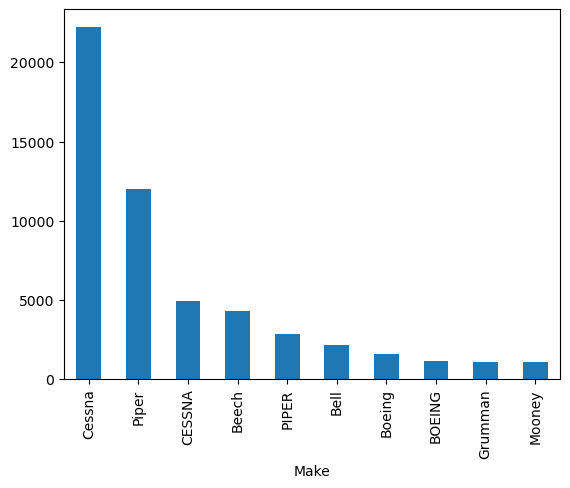

In [33]:
top_makes.plot(kind='bar')


### Line Graphs

Plot annual accident trends

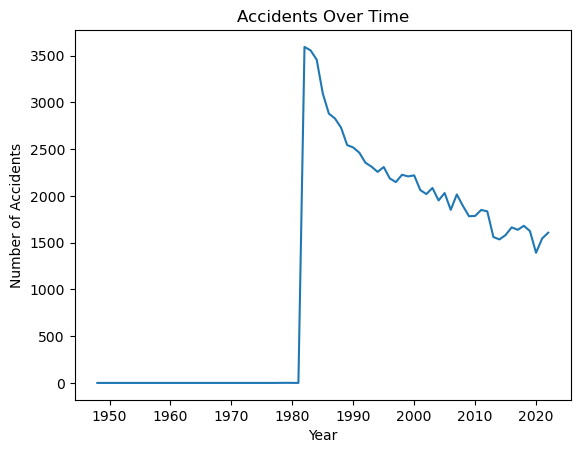

In [34]:
import matplotlib.pyplot as plt
plt.plot(annual_accidents.index, annual_accidents.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents Over Time')
plt.show()


### Scatter Plots

Investigate relationships (e.g., weather vs. severity)

<Axes: xlabel='Weather.Condition', ylabel='Total.Fatal.Injuries'>

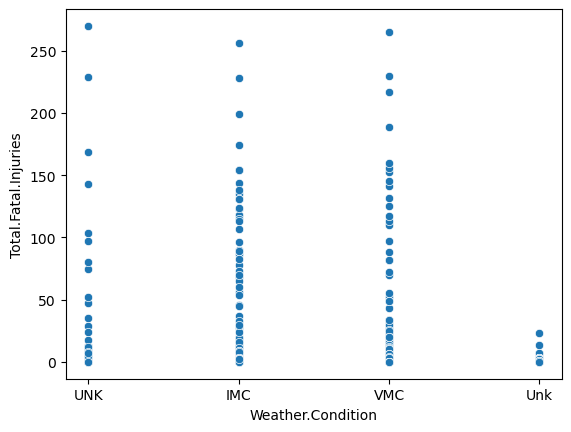

In [35]:
sns.scatterplot(data=aviation_data, x='Weather.Condition', y='Total.Fatal.Injuries')


### Business Recommendations
1.Invest in [specific aircraft type] due to lower injury rates.

2.Focus on operations in favorable weather conditions (e.g., VMC).

3.Avoid acquiring older models of [Specific make] due to higher accident frequency.